In [1]:
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import Sampler

![Phase.jpg](https://learning-api.quantum.ibm.com/assets/91e6052e-f74f-47f7-a68c-2d07b583921b?format=auto&quality=80)

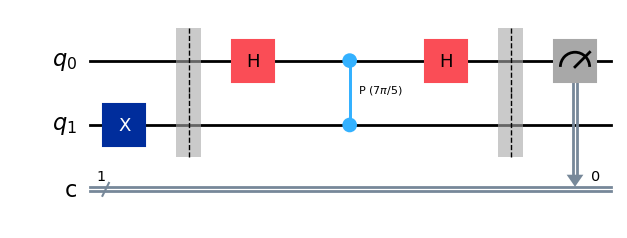

In [51]:
theta = 0.7
qc = QuantumCircuit(2, 1)

qc.x(1)
qc.barrier()

qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

qc.measure(0, 0)

display(qc.draw('mpl'))

math: 0.345 0.655


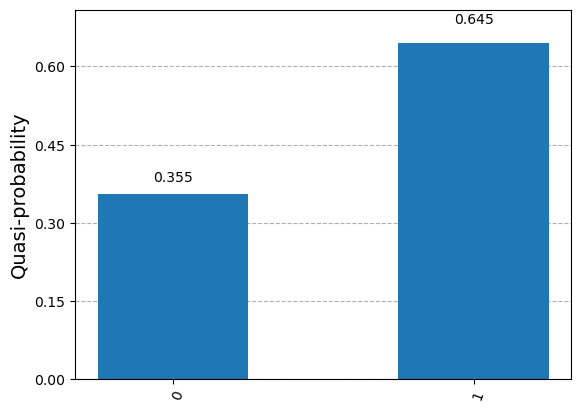

In [52]:
result = Sampler().run(qc).result()
# print(result.quasi_dists)
print("math:", round(cos(pi*theta)**2, 3), round(sin(pi*theta)**2, 3))
stats = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(stats))

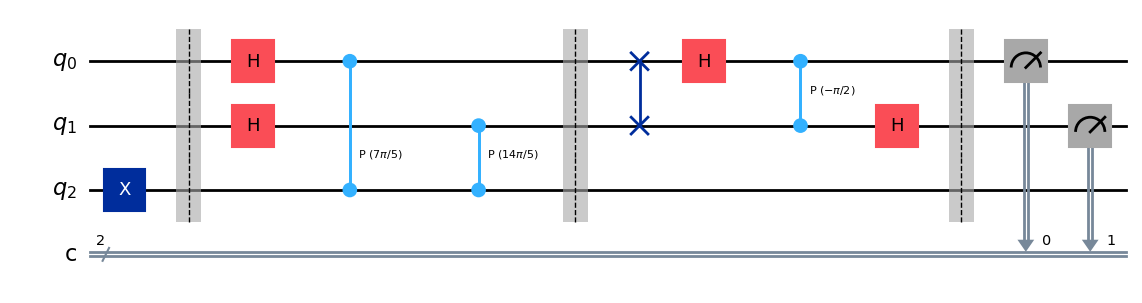

In [76]:
theta = 0.7
qc = QuantumCircuit(3, 2)

# prepare eigenvector
qc.x(2)
qc.barrier()

qc.h(0)
qc.h(1)
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * theta * 2, 1, 2)
qc.barrier()

# QFT2 inverse
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

qc.measure([0, 1], [0, 1])

display(qc.draw('mpl'))

math: [0.033, 0.022, 0.063, 0.882]


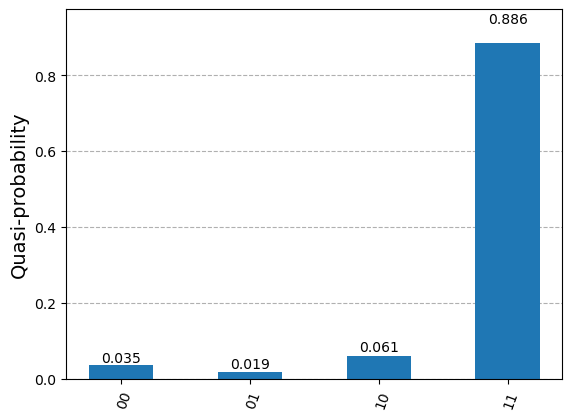

In [87]:
result = Sampler().run(qc).result()
stats = result.quasi_dists[0].binary_probabilities()
print("math:", [round((cos(2*pi*(theta-i/4))*cos(pi*(theta-i/4)))**2, 3) for i in range(4)])
display(plot_histogram(stats))